<font size="4"> <b>Introduction</b><br><font size="2">The purpose of this analysis is to predict how much revenue to expect from each customer within their first year of orders by conducting exploratory data analysis, feature treatment and engineering, and utilizing regression modeling techniques.

<font size="3"><b>Part 1: Exploratory Data Analysis</b>

In [1]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphic output
import statsmodels.formula.api as smf # regression modeling
import random as rand # random number generation
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import Ridge # linear regression (scikit-learn)
from sklearn.linear_model import Lasso # linear regression (scikit-learn)
from sklearn.linear_model import ARDRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression (scikit-learn)
from sklearn.preprocessing import StandardScaler # standard scaler (scikit-learn)
from sklearn.ensemble import RandomForestRegressor # Random forest regression (scikit-learn)
from sklearn.ensemble import GradientBoostingRegressor # Gradient boosting regression (scikit-learn)
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.tree import DecisionTreeRegressor      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
original_df = pd.read_excel(file)

# showing the first 5 rows of the dataset
original_df.head(n = 5)

C:\Users\isabe\New Folder\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


REVENUE  CROSS_SELL_SUCCESS                              NAME  \
0   1880.0                   1                      Addam Osgrey   
1   1495.0                   1                   Aegon Blackfyre   
2   2572.5                   1         Aegon Frey (son of Aenys)   
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)   
4   1923.0                   1                 Aegon V Targaryen   

                                      EMAIL FIRST_NAME  FAMILY_NAME  \
0                 addam.osgrey@passport.com      Addam       Osgrey   
1                   aegon.blackfyre@jnj.com      Aegon    Blackfyre   
2       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey    
3  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen    
4         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen   

   TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
0                  118                   4                            7   
1                   44                   3                            6   
2                   38                   1                            5   
3                   76                   3                            8   
4                   65                   3                            6   

   PRODUCT_CATEGORIES_VIEWED  ...  LATE_DELIVERIES  PACKAGE_LOCKER  \
0                          5  ...                2               1   
1                          3  ...                4               1   
2                          3  ...                0               0   
3                         10  ...                4               0   
4                          9  ...                4               1   

   REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  \
0                    0                            90              165.8   
1                    0                            90              150.5   
2                    0                            80               99.6   
3                    0                            90              125.0   
4                    0                            90              135.3   

   LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  \
0                   6                        1                   3   
1                   4                        1                   3   
2                   3                        0                   3   
3                   3                        0                   3   
4                   3                        1                   3   

   AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  
0                    11                    0  
1                    13                   90  
2                    12                    0  
3                    13                    0  
4                    13                  253  

[5 rows x 29 columns]

In [2]:
# printing column names
print(original_df.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
       'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')


In [3]:
# displaying the information about each variable
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

In [4]:
# descriptive statistics
original_df.describe().round(2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  \
count  1946.00             1946.00              1946.00              1946.0   
mean   2107.29                0.68                74.63                 4.9   
std    1138.29                0.47                55.31                 2.5   
min     131.00                0.00                11.00                 1.0   
25%    1350.00                0.00                39.00                 3.0   
50%    1740.00                1.00                60.00                 5.0   
75%    2670.00                1.00                95.00                 7.0   
max    8793.75                1.00               493.00                19.0   

       CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  \
count                      1946.00                    1946.00   
mean                          6.98                       5.38   
std                           2.28                       3.04   
min                           1.00                       1.00   
25%                           5.00                       3.00   
50%                           7.00                       5.00   
75%                           8.00                       8.00   
max                          18.00                      10.00   

       AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  \
count                  1946.00        1946.00                    1946.00   
mean                     99.60           0.88                       1.40   
std                      62.34           0.33                       1.55   
min                      10.33           0.00                       0.00   
25%                      72.00           1.00                       0.00   
50%                      94.16           1.00                       1.00   
75%                     117.29           1.00                       2.00   
max                    1645.60           1.00                      13.00   

       CANCELLATIONS_AFTER_NOON  ...  LATE_DELIVERIES  PACKAGE_LOCKER  \
count                   1946.00  ...          1946.00         1946.00   
mean                       0.17  ...             2.97            0.36   
std                        0.43  ...             2.74            0.48   
min                        0.00  ...             0.00            0.00   
25%                        0.00  ...             1.00            0.00   
50%                        0.00  ...             2.00            0.00   
75%                        0.00  ...             4.00            1.00   
max                        3.00  ...            19.00            1.00   

       REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  \
count              1946.00                       1946.00            1946.00   
mean                  0.11                         35.41             150.56   
std                   0.32                         26.58              49.45   
min                   0.00                          0.00              33.40   
25%                   0.00                         10.00             114.40   
50%                   0.00                         30.00             145.60   
75%                   0.00                         60.00             173.78   
max                   1.00                         90.00             564.20   

       LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  \
count             1946.00                  1946.00             1946.00   
mean                 4.44                     0.60                2.79   
std                  1.55                     0.64                0.76   
min                  0.00                     0.00                1.00   
25%                  3.00                     0.00                2.00   
50%                  4.00                     1.00                3.00   
75%                  5.00                     1.00                3.00   
max                 11.00                     3.00            

In [5]:
# showing how many rows and columns in the dataset
original_df.shape

(1946, 29)

<b>Missing Value Analysis and Imputation

In [6]:
# Finding the missing values in each variable
original_df.isnull().sum()


REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

<b>Some thoughts here:</b><br>
There are 47 missing values in the column "FAMILY_NAME". The values in FAMILY_NAME" column are all strings, so we can not simply impute the missing values with numerics, for example: mean, median, the most frequently occurring value, etc.

In [7]:
# creating an imputation value
fill = 'Null'

# imputing 'Family Name'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

In [8]:
# checking if there are still any missing values
original_df.isnull().sum().sum()

0

In [9]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [10]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

In [ ]:
"""
# Define the type of each variable

# CONTINUOUS OR INTERVAL
AVG_TIME_PER_SITE_VISIT
FOLLOWED_RECOMMENDATIONS_PCT
AVG_PREP_VID_TIME
AVG_CLICKS_PER_VISIT
MEDIAN_MEAL_RATING
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
EARLY_DELIVERIES
LATE_DELIVERIES
LARGEST_ORDER_SIZE

# BINARY
CROSS_SELL_SUCCESS
MOBILE_NUMBER
TASTES_AND_PREFERENCES
PACKAGE_LOCKER
REFRIGERATED_LOCKER

# COUNT
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH 
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
MOBILE_LOGINS
PC_LOGINS
WEEKLY_PLAN
MASTER_CLASSES_ATTENDED
TOTAL_PHOTOS_VIEWED

# CATEGORICAL
EMAIL
FIRST_NAME
FAMILY_NAME
m_FAMILY_NAME

# DISCRETE
NAME

"""

<font size="3"><b>Part 2: Feature Treatment and Engineering</b>

<b>Adding More Features</b>

- <b>Working with email addresses</b>

In [11]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

0                1
0                         addam.osgrey     passport.com
1                      aegon.blackfyre          jnj.com
2            aegon.frey.(son.of.aenys)        gmail.com
3     aegon.targaryen.(son.of.rhaegar)          ibm.com
4                    aegon.v.targaryen  goldmansacs.com
...                                ...              ...
1941                            yandry        yahoo.com
1942                            yorkel        gmail.com
1943                       young.henly        gmail.com
1944                            ysilla   protonmail.com
1945                      ysilla.royce      hotmail.com

[1946 rows x 2 columns]

In [12]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# renaming column to concatenate
email_df.columns = ['ID', 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df.loc[:, 'EMAIL_DOMAIN']],
                        axis = 1)


# printing value counts of personal_email_domain
original_df.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
merck.com            28
cocacola.com         28
jnj.com              28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
mmm.com              22
caterpillar.com      22
pg.com               22
verizon.com          22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

In [13]:
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com',
                             '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com',
                             '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                             '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                             '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                             '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')

# concatenating with original DataFrame
original_df['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
original_df['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

From the number of professional email domains, we can be sure that there're at least 35.8% customers are professionals.

In [14]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [15]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

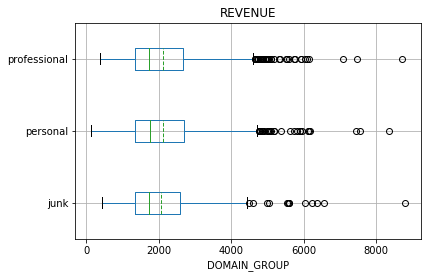

In [16]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
    This function can be used for categorical variables

    PARAMETERS
    ----------
    response : str, response variable
    cat_var  : str, categorical variable
    data     : DataFrame of the response and categorical variables
    """

    data.boxplot(column          = response,
                 by              = cat_var,
                 vert            = False,
                 patch_artist    = False,
                 meanline        = True,
                 showmeans       = True)

    plt.suptitle("")
    plt.savefig('REVENUE & DOMAIN_GROUP.png')
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = "REVENUE",
                     cat_var  = "DOMAIN_GROUP",
                     data     = original_df)

Three boxplots display us that professional and personal email domain groups have similar median and mean,
whereas junk email domain group has a relatively lower median and mean.<br>

Besides, professional and personal email domain groups have more outliers which contribute higher revenue,
compared to junk email domain group.<br>

The target customer group should be those who provide professional and personal email addresses.<br>

Replace "personal" as 0, "professional" as 1, and "junk" as 2, in order to make it easier to do the feature engineering.

In [17]:
original_df['DOMAIN_GROUP'].replace(to_replace = ['personal', 'professional', 'junk'],
                                    value = [0, 1, 2],
                                    inplace = True)

In [18]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [19]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Contacts per Order</b>

Contacts per Order is a sensitive measure of customer satisfaction. A lower "Contacts per Order" means higher customer satisfaction, which may bring more revenue to the company in the future.

In [20]:
original_df['CONTACTS_PER_ORDER'] = original_df['CONTACTS_W_CUSTOMER_SERVICE']/original_df['TOTAL_MEALS_ORDERED']

In [21]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [22]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Login per Order</b>

More Login per Order, more customers engaged in our App, which may bring more revenue to the company in the future.

In [23]:
original_df['LOGIN_PER_ORDER'] = (original_df['MOBILE_LOGINS'] + original_df['PC_LOGINS'])/original_df['TOTAL_MEALS_ORDERED']

In [24]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [25]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Unique Meals Purchased per Order</b>

Larger the proportion of Unique Meals Purchased, more engaged the customers are to our unique meal sets, which may bring more revenue to the company in the future.

In [26]:
original_df['UNIQUE_MEALS_PURCH_PER_ORDER'] = original_df['UNIQUE_MEALS_PURCH']/original_df['TOTAL_MEALS_ORDERED']

In [27]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [28]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Cancellation before Noon per Order</b>

"CANCELLATIONS_BEFORE_NOON" is the "number of meals canceled before 12 PM as per cancellation policy". Lower the Cancellation before Noon per Order, more revenue will be generated.

In [29]:
original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'] = original_df['CANCELLATIONS_BEFORE_NOON']/original_df['TOTAL_MEALS_ORDERED']

In [30]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [31]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

- <b>Cancellation after Noon per Order</b>

"CANCELLATIONS_AFTER_NOON" is the "number of meals canceled after 3 PM as per cancellation policy". Similarly, lower the Cancellation after Noon per Order, more revenue will be generated.

In [32]:
original_df['CANCELLATION_AFTER_NOON_PER_ORDER'] = original_df['CANCELLATIONS_AFTER_NOON']/original_df['TOTAL_MEALS_ORDERED']

In [33]:
# saving results
original_df.to_excel('chef_feature_rich.xlsx',
                     index = False)

In [34]:
# loading saved file
original_df = pd.read_excel('chef_feature_rich.xlsx')

<b>Outlier Analysis

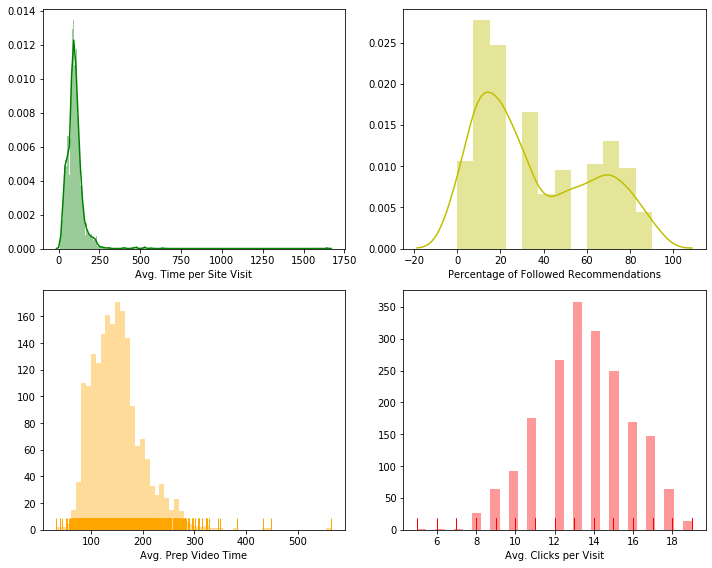

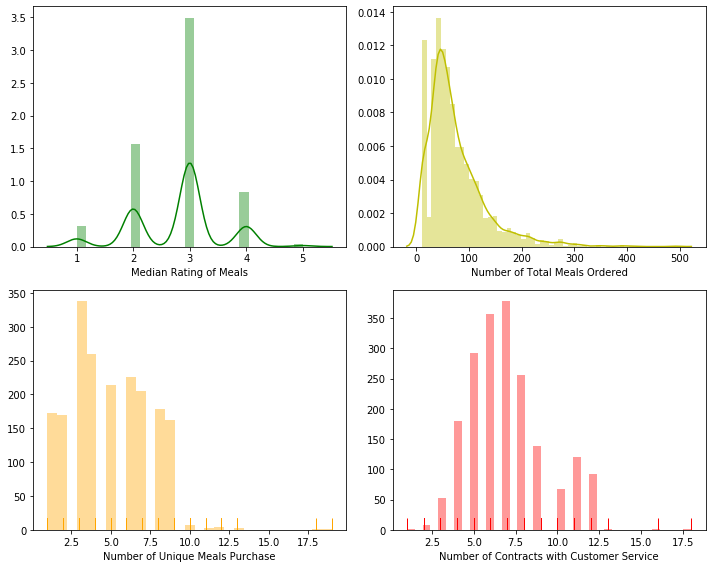

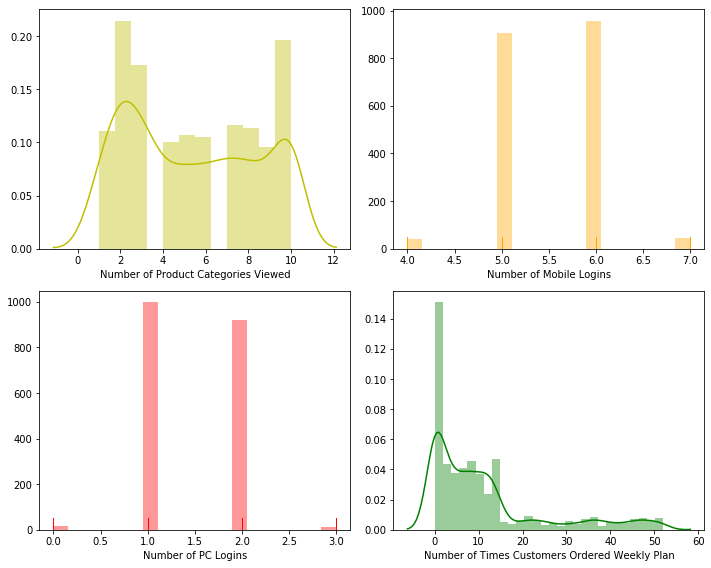

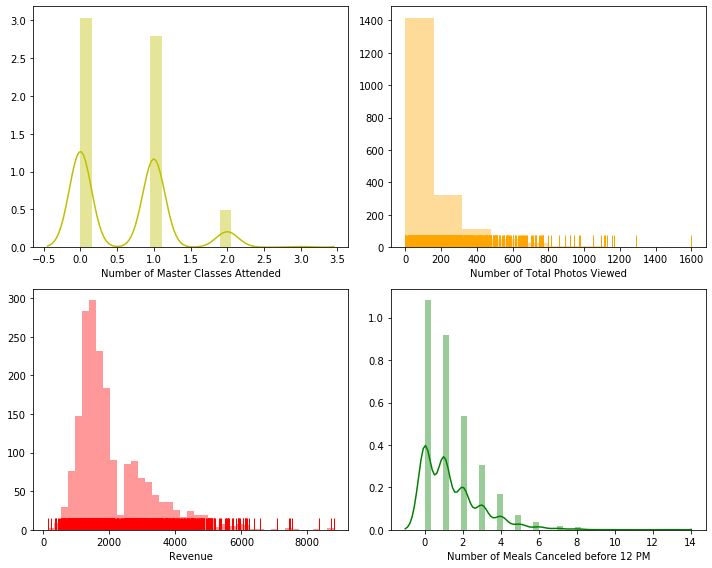

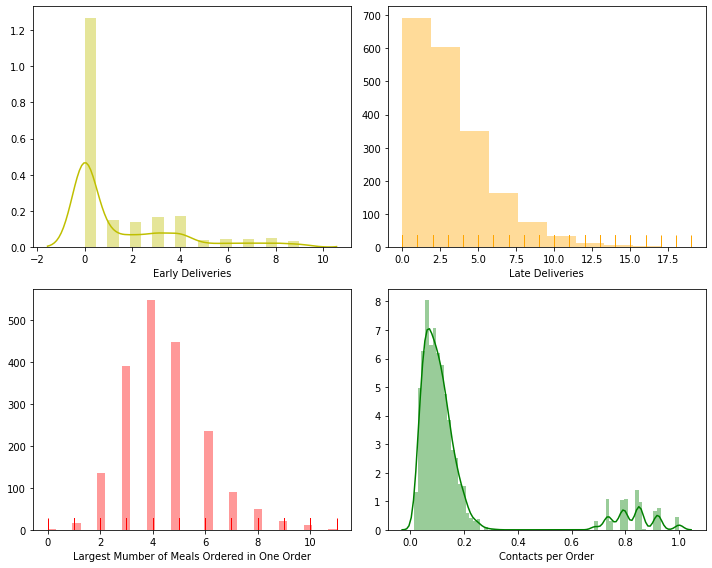

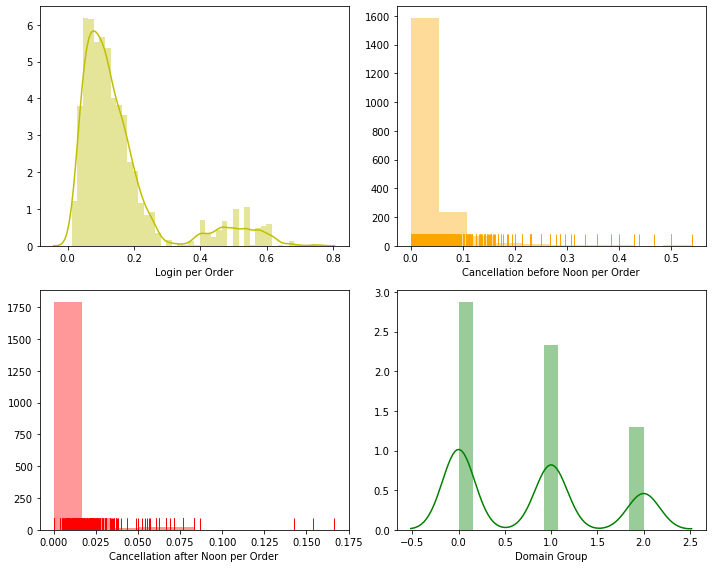

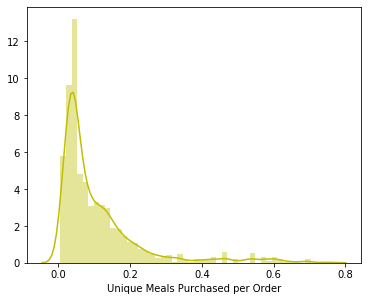

In [35]:
# Visual EDA (Histograms) - displays the shape and spread of continuous variables and count variables

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Avg. Time per Site Visit')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Percentage of Followed Recommendations')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Avg. Prep Video Time')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Avg. Clicks per Visit')
plt.tight_layout()
plt.savefig('original_df Data Histograms 1 to 4.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Median Rating of Meals')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Number of Total Meals Ordered')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of Unique Meals Purchase')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Number of Contracts with Customer Service')
plt.tight_layout()
plt.savefig('original_df Data Histograms 5 to 8.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Number of Product Categories Viewed')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of Mobile Logins')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Number of PC Logins')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Number of Times Customers Ordered Weekly Plan')
plt.tight_layout()
plt.savefig('original_df Data Histograms 9 to 12.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Number of Master Classes Attended')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('Number of Total Photos Viewed')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['REVENUE'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('Revenue')

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Number of Meals Canceled before 12 PM')
plt.tight_layout()
plt.savefig('original_df Data Histograms 13 to 16.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Early Deliveries')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('Late Deliveries')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('Largest Mumber of Meals Ordered in One Order')

plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_PER_ORDER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Contacts per Order')
plt.tight_layout()
plt.savefig('original_df Data Histograms 17 to 20.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['LOGIN_PER_ORDER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Login per Order')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('Cancellation before Noon per Order')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATION_AFTER_NOON_PER_ORDER'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('Cancellation after Noon per Order')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['DOMAIN_GROUP'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Domain Group')
plt.tight_layout()
plt.savefig('original_df Data Histograms 21 to 24.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['UNIQUE_MEALS_PURCH_PER_ORDER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Unique Meals Purchased per Order')
plt.tight_layout()
plt.savefig('original_df Data Histograms 25.png')
plt.show()


In [36]:
# setting outlier thresholds

AVG_TIME_PER_SITE_VISIT_hi = 500
FOLLOWED_RECOMMENDATIONS_PCT_hi = 90
AVG_PREP_VID_TIME_hi = 300
AVG_CLICKS_PER_VISIT_lo = 8
AVG_CLICKS_PER_VISIT_hi = 19
MEDIAN_MEAL_RATING_lo = 1
MEDIAN_MEAL_RATING_hi = 5
TOTAL_MEALS_ORDERED_hi = 300
UNIQUE_MEALS_PURCH_hi = 12.5
CONTACTS_W_CUSTOMER_SERVICE_hi = 12.5
PRODUCT_CATEGORIES_VIEWED_lo = 1
PRODUCT_CATEGORIES_VIEWED_hi = 10
MOBILE_LOGINS_lo = 4
MOBILE_LOGINS_hi = 7
PC_LOGINS_lo = 0
PC_LOGINS_hi = 3
WEEKLY_PLAN_hi = 50
MASTER_CLASSES_ATTENDED_hi = 2
TOTAL_PHOTOS_VIEWED_hi = 500
CANCELLATIONS_BEFORE_NOON_lo = 0
CANCELLATIONS_BEFORE_NOON_hi = 8
EARLY_DELIVERIES_lo = 0
EARLY_DELIVERIES_hi = 9
LATE_DELIVERIES_lo = 0
LATE_DELIVERIES_hi = 15
LARGEST_ORDER_SIZE_lo = 1
LARGEST_ORDER_SIZE_hi = 10
CONTACTS_PER_ORDER_hi = 0.5
LOGIN_PER_ORDER_hi = 0.6
CANCELLATION_BEFORE_NOON_PER_ORDER_lo = 0
CANCELLATION_BEFORE_NOON_PER_ORDER_hi = 0.1
CANCELLATION_AFTER_NOON_PER_ORDER_lo = 0
CANCELLATION_AFTER_NOON_PER_ORDER_hi = 0.02
DOMAIN_GROUP_lo = 0
DOMAIN_GROUP_hi = 2
UNIQUE_MEALS_PURCH_PER_ORDER_hi = 0.2


REVENUE_hi = 5000

#############################################
# Feature Engineering (outlier thresholds)
#############################################

# developing features (columns) for outliers

# Avg. Time per Site Visit
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# Percentage of Followed Recommendations
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

# Avg. Prep Video Time
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)

# Avg. Clicks per Visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                         value      = 1,
                                         inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                         value      = 1,
                                         inplace    = True)

# Median Rating of Meals
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]
condition_lo = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_lo]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                       value      = 1,
                                       inplace    = True)

# Number of Total Meals Ordered
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# Number of Unique Meals Purchase
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                       value      = 1,
                                       inplace    = True)

# Number of Contacts with Customer Service
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)

# Number of Product Categories Viewed
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                              value      = 1,
                                              inplace    = True)

# Number of Mobile Logins
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                  value      = 1,
                                  inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                  value      = 1,
                                  inplace    = True)

# Number of PC Logins
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                              value      = 1,
                              inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                              value      = 1,
                              inplace    = True)

# Number of Times Customers Ordered Weekly Plan
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Number of Master Classes Attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

# Number of Total Photos Viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)
# Number of Meals Canceled before 12 PM
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_lo]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                                     value      = 1,
                                                     inplace    = True)

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_lo,
                                                     value      = 1,
                                                     inplace    = True)

# Early Deliveries
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]
condition_lo = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                            value      = 1,
                                            inplace    = True)

# Late Deliveries
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]
condition_lo = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] < LATE_DELIVERIES_lo]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                           value      = 1,
                                           inplace    = True)

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_lo,
                                           value      = 1,
                                           inplace    = True)

# Largest Mumber of Meals Ordered in One Order
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                              value      = 1,
                                              inplace    = True)

# Contacts per Order
original_df['out_CONTACTS_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_PER_ORDER'][original_df['CONTACTS_PER_ORDER'] > CONTACTS_PER_ORDER_hi]

original_df['out_CONTACTS_PER_ORDER'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# Login per Order
original_df['out_LOGIN_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_LOGIN_PER_ORDER'][original_df['LOGIN_PER_ORDER'] > LOGIN_PER_ORDER_hi]

original_df['out_LOGIN_PER_ORDER'].replace(to_replace = condition_hi,
                                           value      = 1,
                                           inplace    = True)

# Cancellation before Noon per Order
original_df['out_CANCELLATION_BEFORE_NOON_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATION_BEFORE_NOON_PER_ORDER'][original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'] > CANCELLATION_BEFORE_NOON_PER_ORDER_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATION_BEFORE_NOON_PER_ORDER'][original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'] < CANCELLATION_BEFORE_NOON_PER_ORDER_lo]

original_df['out_CANCELLATION_BEFORE_NOON_PER_ORDER'].replace(to_replace = condition_hi,
                                                              value      = 1,
                                                              inplace    = True)

original_df['out_CANCELLATION_BEFORE_NOON_PER_ORDER'].replace(to_replace = condition_lo,
                                                              value      = 1,
                                                              inplace    = True)

# Cancellation after Noon per Order
original_df['out_CANCELLATION_AFTER_NOON_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATION_AFTER_NOON_PER_ORDER'][original_df['CANCELLATION_AFTER_NOON_PER_ORDER'] > CANCELLATION_AFTER_NOON_PER_ORDER_hi]
condition_lo = original_df.loc[0:,'out_CANCELLATION_AFTER_NOON_PER_ORDER'][original_df['CANCELLATION_AFTER_NOON_PER_ORDER'] < CANCELLATION_AFTER_NOON_PER_ORDER_lo]

original_df['out_CANCELLATION_AFTER_NOON_PER_ORDER'].replace(to_replace = condition_hi,
                                                             value      = 1,
                                                             inplace    = True)

original_df['out_CANCELLATION_AFTER_NOON_PER_ORDER'].replace(to_replace = condition_lo,
                                                             value      = 1,
                                                             inplace    = True)

# Domain Group
original_df['out_DOMAIN_GROUP'] = 0
condition_hi = original_df.loc[0:,'out_DOMAIN_GROUP'][original_df['DOMAIN_GROUP'] > DOMAIN_GROUP_hi]
condition_lo = original_df.loc[0:,'out_DOMAIN_GROUP'][original_df['DOMAIN_GROUP'] < DOMAIN_GROUP_lo]

original_df['out_DOMAIN_GROUP'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

original_df['out_DOMAIN_GROUP'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# Unique Meals Purchased per Order
original_df['out_UNIQUE_MEALS_PURCH_PER_ORDER'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH_PER_ORDER'][original_df['UNIQUE_MEALS_PURCH_PER_ORDER'] > UNIQUE_MEALS_PURCH_PER_ORDER_hi]

original_df['out_UNIQUE_MEALS_PURCH_PER_ORDER'].replace(to_replace = condition_hi,
                                                        value      = 1,
                                                        inplace    = True)

# Revenue
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                            value      = 1,
                            inplace    = True)

# checking the first 5 rows
original_df.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS                              NAME  \
0   1880.0                   1                      Addam Osgrey   
1   1495.0                   1                   Aegon Blackfyre   
2   2572.5                   1         Aegon Frey (son of Aenys)   
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)   
4   1923.0                   1                 Aegon V Targaryen   

                                      EMAIL FIRST_NAME  FAMILY_NAME  \
0                 addam.osgrey@passport.com      Addam       Osgrey   
1                   aegon.blackfyre@jnj.com      Aegon    Blackfyre   
2       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey    
3  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen    
4         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen   

   TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
0                  118                   4                            7   
1                   44                   3                            6   
2                   38                   1                            5   
3                   76                   3                            8   
4                   65                   3                            6   

   PRODUCT_CATEGORIES_VIEWED  ...  out_EARLY_DELIVERIES  out_LATE_DELIVERIES  \
0                          5  ...                     0                    0   
1                          3  ...                     0                    0   
2                          3  ...                     0                    0   
3                         10  ...                     0                    0   
4                          9  ...                     0                    0   

   out_LARGEST_ORDER_SIZE  out_CONTACTS_PER_ORDER  out_LOGIN_PER_ORDER  \
0                       0                       0                    0   
1                       0                       0                    0   
2                       0                       0                    0   
3                       0                       0                    0   
4                       0                       0                    0   

   out_CANCELLATION_BEFORE_NOON_PER_ORDER  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   out_CANCELLATION_AFTER_NOON_PER_ORDER  out_DOMAIN_GROUP  \
0                                      0                 0   
1                                      1                 0   
2                                      0                 0   
3                                      0                 0   
4                                      0                 0   

   out_UNIQUE_MEALS_PURCH_PER_ORDER  out_REVENUE  
0                                 0            0  
1                                 0            0  
2                                 0            0  
3                                 0            0  
4                                 0            0  

[5 rows x 61 columns]

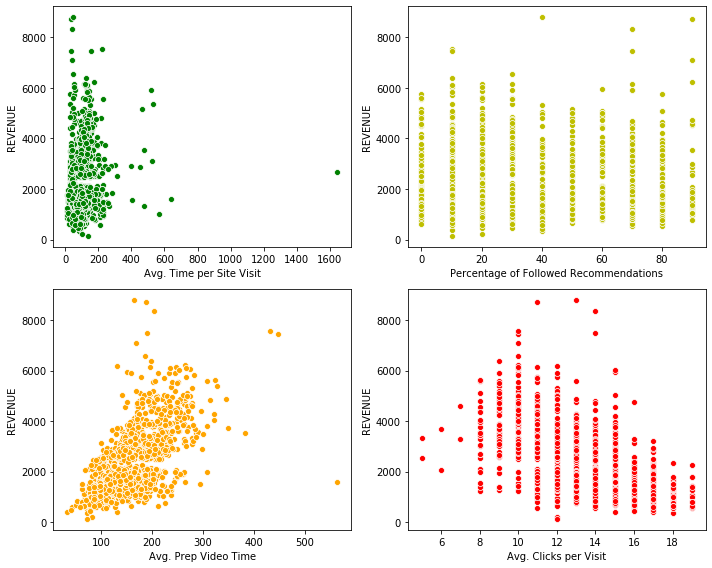

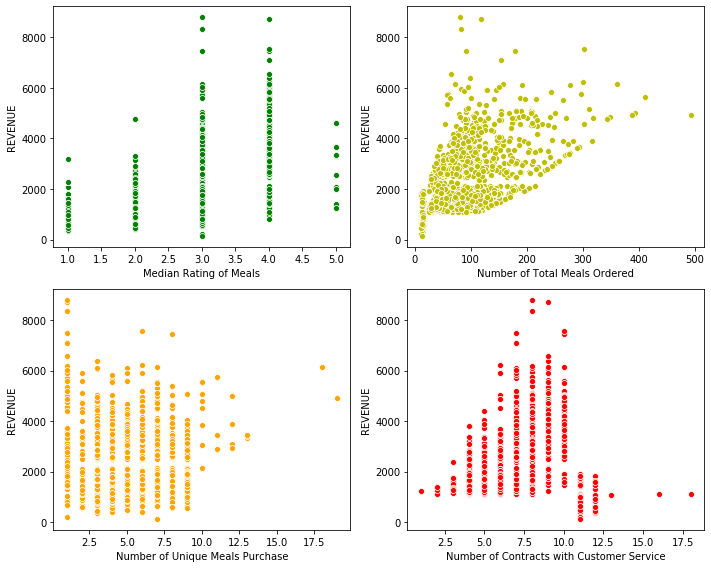

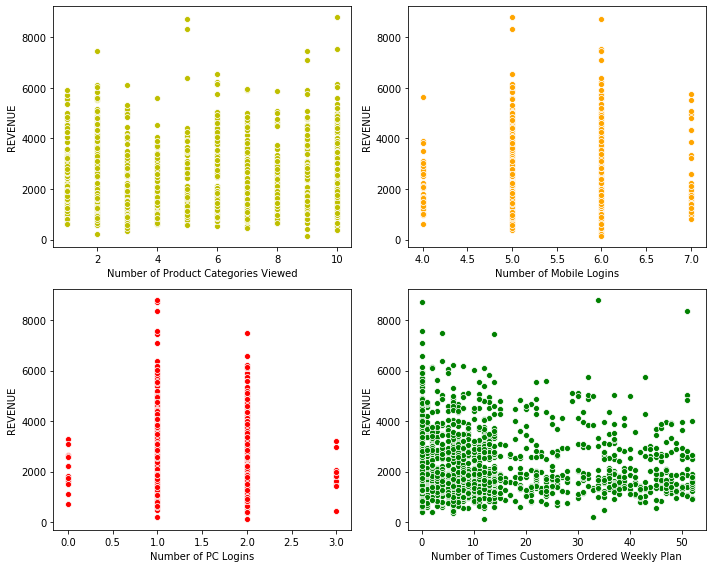

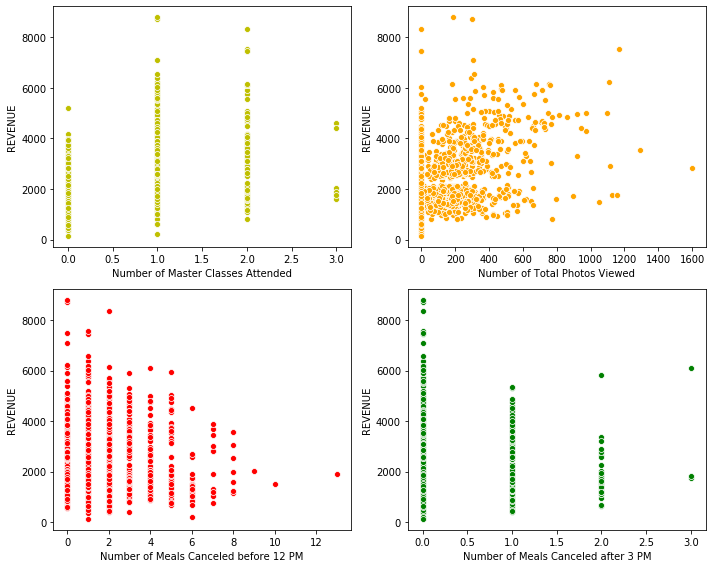

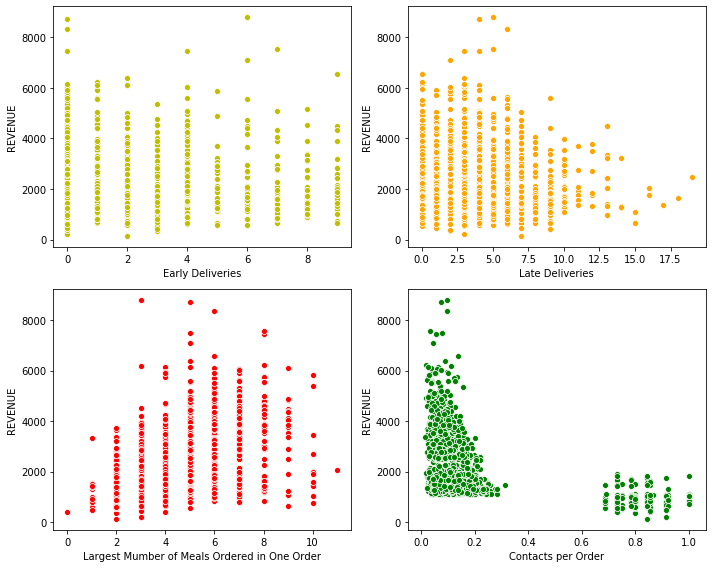

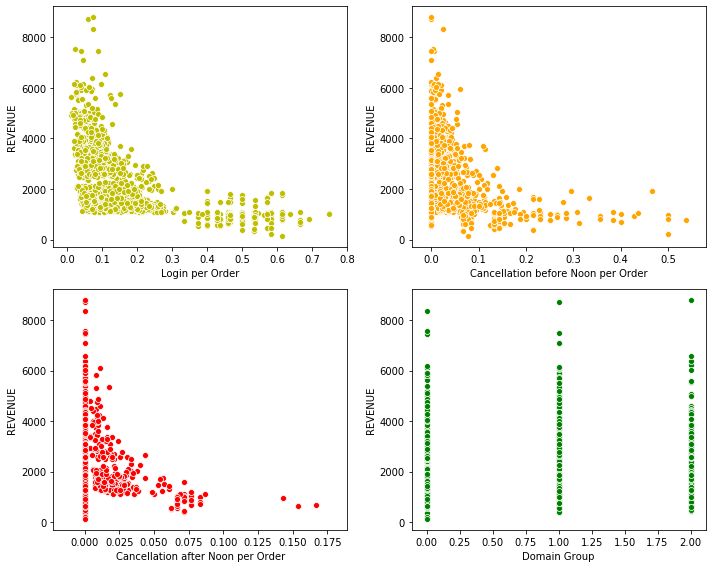

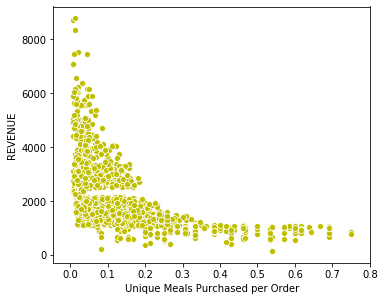

In [37]:
# Developing Trend-based Features
# Visual EDA (Scatterplots) - shows the relationship between two numerical variables

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Avg. Time per Site Visit')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Percentage of Followed Recommendations')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Avg. Prep Video Time')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Avg. Clicks per Visit')
plt.tight_layout()
plt.savefig('original_df Data Scatterplots 1 to 4.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Median Rating of Meals')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Number of Total Meals Ordered')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Number of Unique Meals Purchase')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Number of Contracts with Customer Service')
plt.tight_layout()
plt.savefig('original_df Data Scatterplots 5 to 8.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Number of Product Categories Viewed')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Number of Mobile Logins')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Number of PC Logins')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Number of Times Customers Ordered Weekly Plan')
plt.tight_layout()
plt.savefig('Housing Data Scatterplots 9 to 12.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Number of Master Classes Attended')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Number of Total Photos Viewed')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Number of Meals Canceled before 12 PM')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Number of Meals Canceled after 3 PM')
plt.tight_layout()
plt.savefig('original_df Data Scatterplots 13 to 16.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Early Deliveries')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Late Deliveries')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Largest Mumber of Meals Ordered in One Order')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_PER_ORDER'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Contacts per Order')
plt.tight_layout()
plt.savefig('original_df Data Scatterplots 17 to 20.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['LOGIN_PER_ORDER'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Login per Order')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Cancellation before Noon per Order')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CANCELLATION_AFTER_NOON_PER_ORDER'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Cancellation after Noon per Order')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['DOMAIN_GROUP'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Domain Group')
plt.tight_layout()
plt.savefig('original_df Data Scatterplots 21 to 24.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH_PER_ORDER'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Unique Meals Purchased per Order')
plt.tight_layout()
plt.savefig('original_df Data Scatterplots 25.png')
plt.show()


In [38]:
# After observing the scatterplots above, develop the trend-based thresholds

AVG_PREP_VID_TIME_change_hi = 300 # data scatters above this point
TOTAL_MEALS_ORDERED_change_hi = 300 # data scatters above this point
AVG_CLICKS_PER_VISIT_change_hi = 15 # trend changes above this point- decreasing
CONTACTS_W_CUSTOMER_SERVICE_change_hi = 10 # trend changes above this point- decreasing
LARGEST_ORDER_SIZE_change_hi = 5 # trend changes above this point - decreasing
CONTACTS_PER_ORDER_change_hi = 0.2 # data scatters above this point
LOGIN_PER_ORDER_change_hi = 0.3 # data scatters above this point
CANCELLATION_BEFORE_NOON_PER_ORDER_change_hi = 0.1 # data scatters above this point
UNIQUE_MEALS_PURCH_PER_ORDER_change_hi = 0.2 # data scatters above this point

AVG_TIME_PER_SITE_VISIT_change_at = 0 # inflate at 0
MEDIAN_MEAL_RATING_change_at = 3 # inflate at 3
UNIQUE_MEALS_PURCH_change_at = 1 # inflate at 1
MOBILE_LOGINS_change_at = 6 # inflate at 6
PC_LOGINS_change_at = 1 # inflate at 1
WEEKLY_PLAN_change_at = 0 # inflate at 0
MASTER_CLASSES_ATTENDED_change_at = 1 # inflate at 1
TOTAL_PHOTOS_VIEWED_change_at = 0 # inflate at 0
CANCELLATIONS_BEFORE_NOON_change_at = 1 # inflate at 1
CANCELLATIONS_AFTER_NOON_change_at = 0 # inflate at 0
CANCELLATION_AFTER_NOON_PER_ORDER_change_at = 0 # inflate at 0


In [39]:
#############################################
# Feature Engineering (trend changes)
#############################################

# developing features (columns) for outliers

#############################################
# change above threshold         
#############################################

# greater than sign

# Avg. Prep Video Time
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change_hi]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)

# Number of Total Meals Ordered
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change_hi]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                                  value      = 1,
                                                  inplace    = True)

# Avg. Clicks per Visit
original_df['change_AVG_CLICKS_PER_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_change_hi]

original_df['change_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                                   value      = 1,
                                                   inplace    = True)

# Number of Contracts with Customer Service
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change_hi]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                                          value      = 1,
                                                          inplace    = True)

# Largest Mumber of Meals Ordered in One Order
original_df['change_LARGEST_ORDER_SIZE'] = 0
condition = original_df.loc[0:,'change_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_change_hi]

original_df['change_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                                 value      = 1,
                                                 inplace    = True)

# Contacts per Order
original_df['change_CONTACTS_PER_ORDER'] = 0
condition = original_df.loc[0:,'change_CONTACTS_PER_ORDER'][original_df['CONTACTS_PER_ORDER'] > CONTACTS_PER_ORDER_change_hi]

original_df['change_CONTACTS_PER_ORDER'].replace(to_replace = condition,
                                                 value      = 1,
                                                 inplace    = True)

# Login per Order
original_df['change_LOGIN_PER_ORDER'] = 0
condition = original_df.loc[0:,'change_LOGIN_PER_ORDER'][original_df['LOGIN_PER_ORDER'] > LOGIN_PER_ORDER_change_hi]

original_df['change_LOGIN_PER_ORDER'].replace(to_replace = condition,
                                              value      = 1,
                                              inplace    = True)

# Cancellation before Noon per Order
original_df['change_CANCELLATION_BEFORE_NOON_PER_ORDER'] = 0
condition = original_df.loc[0:,'change_CANCELLATION_BEFORE_NOON_PER_ORDER'][original_df['CANCELLATION_BEFORE_NOON_PER_ORDER'] > CANCELLATION_BEFORE_NOON_PER_ORDER_change_hi]

original_df['change_CANCELLATION_BEFORE_NOON_PER_ORDER'].replace(to_replace = condition,
                                                                 value      = 1,
                                                                 inplace    = True)

# Unique Meals Purchased per Order
original_df['change_UNIQUE_MEALS_PURCH_PER_ORDER'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH_PER_ORDER'][original_df['UNIQUE_MEALS_PURCH_PER_ORDER'] > UNIQUE_MEALS_PURCH_PER_ORDER_change_hi]

original_df['change_UNIQUE_MEALS_PURCH_PER_ORDER'].replace(to_replace = condition,
                                                           value      = 1,
                                                           inplace    = True)

#############################################
# change at threshold                
#############################################

# double-equals sign

# Avg. Time per Site Visit
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] == AVG_TIME_PER_SITE_VISIT_change_at]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                                      value      = 1,
                                                      inplace    = True)

# Median Rating of Meals
original_df['change_MEDIAN_MEAL_RATING'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change_at]

original_df['change_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                                 value      = 1,
                                                 inplace    = True)

# Number of Unique Meals Purchase
original_df['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_change_at]

original_df['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                                 value      = 1,
                                                 inplace    = True)

# Number of Mobile Logins
original_df['change_MOBILE_LOGINS'] = 0
condition = original_df.loc[0:,'change_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] == MOBILE_LOGINS_change_at]

original_df['change_MOBILE_LOGINS'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)

# Number of PC Logins
original_df['change_PC_LOGINS'] = 0
condition = original_df.loc[0:,'change_PC_LOGINS'][original_df['PC_LOGINS'] == PC_LOGINS_change_at]

original_df['change_PC_LOGINS'].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

# Number of Times Customers Ordered Weekly Plan
original_df['change_WEEKLY_PLAN'] = 0
condition = original_df.loc[0:,'change_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] == WEEKLY_PLAN_change_at]

original_df['change_WEEKLY_PLAN'].replace(to_replace = condition,
                                          value      = 1,
                                          inplace    = True)

# Number of Master Classes Attended
original_df['change_MASTER_CLASSES_ATTENDED'] = 0
condition = original_df.loc[0:,'change_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] == MASTER_CLASSES_ATTENDED_change_at]

original_df['change_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition,
                                                      value      = 1,
                                                      inplace    = True)

# Number of Total Photos Viewed
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                                  value      = 1,
                                                  inplace    = True)

# Number of Meals Canceled before 12 PM
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_change_at]

original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                                        value      = 1,
                                                        inplace    = True)

# Number of Meals Canceled after 3 PM
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_change_at]

original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                                        value      = 1,
                                                        inplace    = True)

# Cancellation after Noon per Order
original_df['change_CANCELLATION_AFTER_NOON_PER_ORDER'] = 0
condition = original_df.loc[0:,'change_CANCELLATION_AFTER_NOON_PER_ORDER'][original_df['CANCELLATION_AFTER_NOON_PER_ORDER'] == CANCELLATION_AFTER_NOON_PER_ORDER_change_at]

original_df['change_CANCELLATION_AFTER_NOON_PER_ORDER'].replace(to_replace = condition,
                                                                value      = 1,
                                                                inplace    = True)

# checking the first 5 rows
original_df.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS                              NAME  \
0   1880.0                   1                      Addam Osgrey   
1   1495.0                   1                   Aegon Blackfyre   
2   2572.5                   1         Aegon Frey (son of Aenys)   
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)   
4   1923.0                   1                 Aegon V Targaryen   

                                      EMAIL FIRST_NAME  FAMILY_NAME  \
0                 addam.osgrey@passport.com      Addam       Osgrey   
1                   aegon.blackfyre@jnj.com      Aegon    Blackfyre   
2       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey    
3  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen    
4         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen   

   TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
0                  118                   4                            7   
1                   44                   3                            6   
2                   38                   1                            5   
3                   76                   3                            8   
4                   65                   3                            6   

   PRODUCT_CATEGORIES_VIEWED  ...  change_MEDIAN_MEAL_RATING  \
0                          5  ...                          1   
1                          3  ...                          1   
2                          3  ...                          1   
3                         10  ...                          1   
4                          9  ...                          1   

   change_UNIQUE_MEALS_PURCH  change_MOBILE_LOGINS  change_PC_LOGINS  \
0                          0                     1                 0   
1                          0                     1                 1   
2                          1                     1                 0   
3                          0                     1                 1   
4                          0                     1                 0   

   change_WEEKLY_PLAN  change_MASTER_CLASSES_ATTENDED  \
0                   0                               1   
1                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               1   

   change_TOTAL_PHOTOS_VIEWED  change_CANCELLATIONS_BEFORE_NOON  \
0                           1                                 0   
1                           0                                 0   
2                           1                                 0   
3                           1                                 0   
4                           0                                 1   

   change_CANCELLATIONS_AFTER_NOON  change_CANCELLATION_AFTER_NOON_PER_ORDER  
0                                0                                         0  
1                                0                                         0  
2                                1                                         1  
3                                1                                         1  
4                                0                                         0  

[5 rows x 81 columns]

In [40]:
# checking the shape of dataframe
original_df.shape

(1946, 81)

In [41]:
# saving the file
original_df.to_excel('chef_feature_rich.xlsx',
                    index = False)

<font size="3"><b>Part 3: Regression Modeling</b>

In [42]:
# import the new dataset
original_df = pd.read_excel('chef_feature_rich.xlsx')

# checking the first 5 rows
original_df.head(n = 5)


REVENUE  CROSS_SELL_SUCCESS                              NAME  \
0   1880.0                   1                      Addam Osgrey   
1   1495.0                   1                   Aegon Blackfyre   
2   2572.5                   1         Aegon Frey (son of Aenys)   
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)   
4   1923.0                   1                 Aegon V Targaryen   

                                      EMAIL FIRST_NAME  FAMILY_NAME  \
0                 addam.osgrey@passport.com      Addam       Osgrey   
1                   aegon.blackfyre@jnj.com      Aegon    Blackfyre   
2       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey    
3  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen    
4         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen   

   TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  \
0                  118                   4                            7   
1                   44                   3                            6   
2                   38                   1                            5   
3                   76                   3                            8   
4                   65                   3                            6   

   PRODUCT_CATEGORIES_VIEWED  ...  change_MEDIAN_MEAL_RATING  \
0                          5  ...                          1   
1                          3  ...                          1   
2                          3  ...                          1   
3                         10  ...                          1   
4                          9  ...                          1   

   change_UNIQUE_MEALS_PURCH  change_MOBILE_LOGINS  change_PC_LOGINS  \
0                          0                     1                 0   
1                          0                     1                 1   
2                          1                     1                 0   
3                          0                     1                 1   
4                          0                     1                 0   

   change_WEEKLY_PLAN  change_MASTER_CLASSES_ATTENDED  \
0                   0                               1   
1                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               1   

   change_TOTAL_PHOTOS_VIEWED  change_CANCELLATIONS_BEFORE_NOON  \
0                           1                                 0   
1                           0                                 0   
2                           1                                 0   
3                           1                                 0   
4                           0                                 1   

   change_CANCELLATIONS_AFTER_NOON  change_CANCELLATION_AFTER_NOON_PER_ORDER  
0                                0                                         0  
1                                0                                         0  
2                                1                                         1  
3                                1                                         1  
4                                0                                         0  

[5 rows x 81 columns]

<b>Linear Regression Model - OLS

In [43]:
# preparing explanatory variable data
chef_data = original_df.drop(['REVENUE',
                              'out_REVENUE'],
                              axis = 1)

# preparing response variable data
chef_target = original_df.loc[:, 'REVENUE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(chef_data,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222)

# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 79)
(1459,)
(487, 79)
(487,)


In [44]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False).head(15))
print(df_corr.loc['REVENUE'].sort_values(ascending = True).head(15))


REVENUE                           1.00
AVG_PREP_VID_TIME                 0.64
MEDIAN_MEAL_RATING                0.61
TOTAL_MEALS_ORDERED               0.60
out_REVENUE                       0.54
TOTAL_PHOTOS_VIEWED               0.47
MASTER_CLASSES_ATTENDED           0.45
LARGEST_ORDER_SIZE                0.44
change_LARGEST_ORDER_SIZE         0.36
change_MASTER_CLASSES_ATTENDED    0.33
out_TOTAL_PHOTOS_VIEWED           0.29
out_TOTAL_MEALS_ORDERED           0.23
change_TOTAL_MEALS_ORDERED        0.23
change_UNIQUE_MEALS_PURCH         0.21
out_AVG_PREP_VID_TIME             0.19
Name: REVENUE, dtype: float64
AVG_CLICKS_PER_VISIT                        -0.55
LOGIN_PER_ORDER                             -0.50
UNIQUE_MEALS_PURCH_PER_ORDER                -0.45
CONTACTS_PER_ORDER                          -0.40
change_TOTAL_PHOTOS_VIEWED                  -0.37
change_CONTACTS_PER_ORDER                   -0.37
out_CONTACTS_PER_ORDER                      -0.36
change_CONTACTS_W_CUSTOMER_SERVICE 

Choose x variables which have strong correlation with revenue

In [45]:
# declaring set of x-variables

x_variables = ['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED',
              'TOTAL_PHOTOS_VIEWED', 'MASTER_CLASSES_ATTENDED',
              'LARGEST_ORDER_SIZE', 'change_LARGEST_ORDER_SIZE',
              'change_MASTER_CLASSES_ATTENDED', 'out_TOTAL_PHOTOS_VIEWED',
              'out_TOTAL_MEALS_ORDERED', 'change_TOTAL_MEALS_ORDERED', 'change_UNIQUE_MEALS_PURCH',
              'AVG_CLICKS_PER_VISIT', 'LOGIN_PER_ORDER', 'UNIQUE_MEALS_PURCH_PER_ORDER', 'CONTRACT_PER_ORDER',
              'change_TOTAL_PHOTOS_VIEWED', 'change_CONTRACT_PER_ORDER', 'out_CONTRACT_PER_ORDER',
              'change_CONTACTS_W_CUSTOMER_SERVICE', 'change_LOGIN_PER_ORDER',
              'out_UNIQUE_MEALS_PURCH_PER_ORDER', 'change_AVG_CLICKS_PER_VISIT', 
              'change_UNIQUE_MEALS_PURCH_PER_ORDER', 'CANCELLATION_BEFORE_NOON_PER_ORDER', 
              'out_CANCELLATION_BEFORE_NOON_PER_ORDER', 'change_CANCELLATION_BEFORE_NOON_PER_ORDER']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"chef_train['{val}'] +")

chef_train['AVG_PREP_VID_TIME'] +
chef_train['MEDIAN_MEAL_RATING'] +
chef_train['TOTAL_MEALS_ORDERED'] +
chef_train['TOTAL_PHOTOS_VIEWED'] +
chef_train['MASTER_CLASSES_ATTENDED'] +
chef_train['LARGEST_ORDER_SIZE'] +
chef_train['change_LARGEST_ORDER_SIZE'] +
chef_train['change_MASTER_CLASSES_ATTENDED'] +
chef_train['out_TOTAL_PHOTOS_VIEWED'] +
chef_train['out_TOTAL_MEALS_ORDERED'] +
chef_train['change_TOTAL_MEALS_ORDERED'] +
chef_train['change_UNIQUE_MEALS_PURCH'] +
chef_train['AVG_CLICKS_PER_VISIT'] +
chef_train['LOGIN_PER_ORDER'] +
chef_train['UNIQUE_MEALS_PURCH_PER_ORDER'] +
chef_train['CONTRACT_PER_ORDER'] +
chef_train['change_TOTAL_PHOTOS_VIEWED'] +
chef_train['change_CONTRACT_PER_ORDER'] +
chef_train['out_CONTRACT_PER_ORDER'] +
chef_train['change_CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['change_LOGIN_PER_ORDER'] +
chef_train['out_UNIQUE_MEALS_PURCH_PER_ORDER'] +
chef_train['change_AVG_CLICKS_PER_VISIT'] +
chef_train['change_UNIQUE_MEALS_PURCH_PER_ORDER'] +
chef_train['CANCELLATI

In [47]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ chef_train['AVG_PREP_VID_TIME'] +
                                chef_train['MEDIAN_MEAL_RATING'] +
                                chef_train['TOTAL_MEALS_ORDERED'] +
                                chef_train['TOTAL_PHOTOS_VIEWED'] +
                                chef_train['MASTER_CLASSES_ATTENDED'] +
                                chef_train['LARGEST_ORDER_SIZE'] +
                                chef_train['change_LARGEST_ORDER_SIZE'] +
                                chef_train['change_MASTER_CLASSES_ATTENDED'] +
                                chef_train['out_TOTAL_PHOTOS_VIEWED'] +
                                chef_train['out_TOTAL_MEALS_ORDERED'] +
                                chef_train['change_TOTAL_MEALS_ORDERED'] +
                                chef_train['change_UNIQUE_MEALS_PURCH'] +
                                chef_train['AVG_CLICKS_PER_VISIT'] +
                                chef_train['LOGIN_PER_ORDER'] +
                                chef_train['UNIQUE_MEALS_PURCH_PER_ORDER'] +
                                chef_train['CONTACTS_PER_ORDER'] +
                                chef_train['change_TOTAL_PHOTOS_VIEWED'] +
                                chef_train['change_CONTACTS_PER_ORDER'] +
                                chef_train['out_CONTACTS_PER_ORDER'] +
                                chef_train['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                chef_train['change_LOGIN_PER_ORDER'] +
                                chef_train['out_UNIQUE_MEALS_PURCH_PER_ORDER'] +
                                chef_train['change_AVG_CLICKS_PER_VISIT'] +
                                chef_train['change_UNIQUE_MEALS_PURCH_PER_ORDER'] +
                                chef_train['CANCELLATION_BEFORE_NOON_PER_ORDER'] +
                                chef_train['out_CANCELLATION_BEFORE_NOON_PER_ORDER'] +
                                chef_train['change_CANCELLATION_BEFORE_NOON_PER_ORDER']""",
                                data = chef_train)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     174.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:56:28   Log-Likelihood:                -11347.
No. Observations:                1459   AIC:                         2.274e+04
Df Residuals:                    1435   BIC:                         2.287e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Based on the p-value, remove some statistically-insignificant x-variables

In [54]:
# declaring set of x-variables
x_variables = ['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED',
              'TOTAL_PHOTOS_VIEWED', 'MASTER_CLASSES_ATTENDED',
              'LARGEST_ORDER_SIZE', 'out_TOTAL_PHOTOS_VIEWED',
              'change_UNIQUE_MEALS_PURCH', 'AVG_CLICKS_PER_VISIT', 
              'LOGIN_PER_ORDER', 'CONTACTS_PER_ORDER',
              'change_CONTACTS_PER_ORDER', 'out_CONTACTS_PER_ORDER',
              'change_CONTACTS_W_CUSTOMER_SERVICE', 'change_AVG_CLICKS_PER_VISIT']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"chef_train['{val}'] +")

chef_train['AVG_PREP_VID_TIME'] +
chef_train['MEDIAN_MEAL_RATING'] +
chef_train['TOTAL_MEALS_ORDERED'] +
chef_train['TOTAL_PHOTOS_VIEWED'] +
chef_train['MASTER_CLASSES_ATTENDED'] +
chef_train['LARGEST_ORDER_SIZE'] +
chef_train['out_TOTAL_PHOTOS_VIEWED'] +
chef_train['change_UNIQUE_MEALS_PURCH'] +
chef_train['AVG_CLICKS_PER_VISIT'] +
chef_train['LOGIN_PER_ORDER'] +
chef_train['CONTACTS_PER_ORDER'] +
chef_train['change_CONTACTS_PER_ORDER'] +
chef_train['out_CONTACTS_PER_ORDER'] +
chef_train['change_CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['change_AVG_CLICKS_PER_VISIT'] +


In [55]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ chef_train['AVG_PREP_VID_TIME'] +
                                chef_train['MEDIAN_MEAL_RATING'] +
                                chef_train['TOTAL_MEALS_ORDERED'] +
                                chef_train['TOTAL_PHOTOS_VIEWED'] +
                                chef_train['MASTER_CLASSES_ATTENDED'] +
                                chef_train['LARGEST_ORDER_SIZE'] +
                                chef_train['out_TOTAL_PHOTOS_VIEWED'] +
                                chef_train['change_UNIQUE_MEALS_PURCH'] +
                                chef_train['AVG_CLICKS_PER_VISIT'] +
                                chef_train['LOGIN_PER_ORDER'] +
                                chef_train['CONTACTS_PER_ORDER'] +
                                chef_train['change_CONTACTS_PER_ORDER'] +
                                chef_train['out_CONTACTS_PER_ORDER'] +
                                chef_train['change_CONTACTS_W_CUSTOMER_SERVICE'] +
                                chef_train['change_AVG_CLICKS_PER_VISIT']""",
                                data = chef_train)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     285.4
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:55:34   Log-Likelihood:                -11353.
No. Observations:                1459   AIC:                         2.274e+04
Df Residuals:                    1444   BIC:                         2.281e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

- <b>Standardize the data

In [57]:
# declaring set of x-variables
x_variables = ['AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 'TOTAL_MEALS_ORDERED',
              'TOTAL_PHOTOS_VIEWED', 'MASTER_CLASSES_ATTENDED',
              'LARGEST_ORDER_SIZE', 'out_TOTAL_PHOTOS_VIEWED',
              'change_UNIQUE_MEALS_PURCH', 'AVG_CLICKS_PER_VISIT', 
              'LOGIN_PER_ORDER', 'CONTACTS_PER_ORDER',
              'change_CONTACTS_PER_ORDER', 'out_CONTACTS_PER_ORDER',
              'change_CONTACTS_W_CUSTOMER_SERVICE', 'change_AVG_CLICKS_PER_VISIT']

# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
chef_data   = original_df.loc[ : , x_variables]

# Preparing the target variable
chef_target = original_df.loc[ : , 'REVENUE']

In [58]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with chef_data
scaler.fit(chef_data)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)
# now it's an array

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = chef_data.columns

# checking the results
X_scaled_df

AVG_PREP_VID_TIME  MEDIAN_MEAL_RATING  TOTAL_MEALS_ORDERED  \
0              0.308356            0.271092             0.784256   
1             -0.001144            0.271092            -0.554007   
2             -1.030790            0.271092            -0.662515   
3             -0.516979            0.271092             0.024701   
4             -0.308622            0.271092            -0.174230   
...                 ...                 ...                  ...   
1941          -0.664649            0.271092            -0.662515   
1942          -1.061134            0.271092            -0.499753   
1943          -1.297810           -1.051076            -1.096546   
1944          -1.287696           -1.051076            -1.078461   
1945          -0.711175           -1.051076            -0.825276   

      TOTAL_PHOTOS_VIEWED  MASTER_CLASSES_ATTENDED  LARGEST_ORDER_SIZE  \
0               -0.588137                 0.616617            1.008147   
1               -0.090810                 0.616617           -0.281698   
2               -0.588137                -0.941742           -0.926621   
3               -0.588137                -0.941742           -0.926621   
4                0.809903                 0.616617           -0.926621   
...                   ...                      ...                 ...   
1941            -0.046603                -0.941742           -0.281698   
1942            -0.588137                -0.941742           -0.926621   
1943            -0.588137                 0.616617           -0.926621   
1944            -0.588137                -0.941742           -2.216466   
1945            -0.588137                -0.941742            0.363225   

      out_TOTAL_PHOTOS_VIEWED  change_UNIQUE_MEALS_PURCH  \
0                   -0.213716                  -0.312370   
1                   -0.213716                  -0.312370   
2                   -0.213716                   3.201336   
3                   -0.213716                  -0.312370   
4                   -0.213716                  -0.312370   
...                       ...                        ...   
1941                -0.213716                  -0.312370   
1942                -0.213716                  -0.312370   
1943                -0.213716                  -0.312370   
1944                -0.213716                  -0.312370   
1945                -0.213716                  -0.312370   

      AVG_CLICKS_PER_VISIT  LOGIN_PER_ORDER  CONTACTS_PER_ORDER  \
0                -1.074979        -0.659470           -0.519286   
1                -0.217815         0.005138           -0.191950   
2                -0.646397         0.379580           -0.212280   
3                -0.217815        -0.482507           -0.324091   
4                -0.217815        -0.257038           -0.379136   
...                    ...              ...                 ...   
1941             -0.646397         0.379580           -0.100469   
1942             -0.217815         0.086104           -0.409733   
1943              1.925095         2.486905            2.567022   
1944              1.496513         2.729566            2.627720   
1945              0.210767         1.106244           -0.185291   

      change_CONTACTS_PER_ORDER  out_CONTACTS_PER_ORDER  \
0                     -0.409960               -0.353349   
1                     -0.409960               -0.353349   
2                     -0.409960               -0.353349   
3                     -0.409960               -0.353349   
4                     -0.409960               -0.353349   
...                         ...                     ...   
1941                  -0.409960               -0.353349   
1942                  -0.409960               -0.353349   
1943                   2.439262                2.830063   
1944                   2.439262                2.830063   
1945                  -0.409960               -0.353349   

      change_CONTACTS_W_CUSTOMER_SERVICE  change_AVG_CLICKS_PER_V

In [59]:
X_scaled_df.describe().round(2)

AVG_PREP_VID_TIME  MEDIAN_MEAL_RATING  TOTAL_MEALS_ORDERED  \
count            1946.00             1946.00              1946.00   
mean                0.00                0.00                 0.00   
std                 1.00                1.00                 1.00   
min                -2.37               -2.37                -1.15   
25%                -0.73               -1.05                -0.64   
50%                -0.10                0.27                -0.26   
75%                 0.47                0.27                 0.37   
max                 8.37                2.92                 7.57   

       TOTAL_PHOTOS_VIEWED  MASTER_CLASSES_ATTENDED  LARGEST_ORDER_SIZE  \
count              1946.00                  1946.00             1946.00   
mean                 -0.00                    -0.00               -0.00   
std                   1.00                     1.00                1.00   
min                  -0.59                    -0.94               -2.86   
25%                  -0.59                    -0.94               -0.93   
50%                  -0.59                     0.62               -0.28   
75%                   0.37                     0.62                0.36   
max                   8.25                     3.73                4.23   

       out_TOTAL_PHOTOS_VIEWED  change_UNIQUE_MEALS_PURCH  \
count                  1946.00                    1946.00   
mean                     -0.00                       0.00   
std                       1.00                       1.00   
min                      -0.21                      -0.31   
25%                      -0.21                      -0.31   
50%                      -0.21                      -0.31   
75%                      -0.21                      -0.31   
max                       4.68                       3.20   

       AVG_CLICKS_PER_VISIT  LOGIN_PER_ORDER  CONTACTS_PER_ORDER  \
count               1946.00          1946.00             1946.00   
mean                  -0.00             0.00               -0.00   
std                    1.00             1.00                1.00   
min                   -3.65            -1.06               -0.71   
25%                   -0.65            -0.62               -0.49   
50%                   -0.22            -0.31               -0.34   
75%                    0.64             0.14               -0.13   
max                    2.35             4.31                3.48   

       change_CONTACTS_PER_ORDER  out_CONTACTS_PER_ORDER  \
count                    1946.00                 1946.00   
mean                        0.00                    0.00   
std                         1.00                    1.00   
min                        -0.41                   -0.35   
25%                        -0.41                   -0.35   
50%                        -0.41                   -0.35   
75%                        -0.41                   -0.35   
max                         2.44                    2.83   

       change_CONTACTS_W_CUSTOMER_SERVICE  change_AVG_CLICKS_PER_VISIT  
count                             1946.00                      1946.00  
mean                                 0.00                        -0.00  
std                                  1.00                         1.00  
min                                 -0.35                        -0.50  
25%                                 -0.35                        -0.50  
50%                                 -0.35                        -0.50  
75%                                 -0.35                        -0.50  
max                                  2.83                         1.98

In [60]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
AVG_PREP_VID_TIME                      2443.767133
MEDIAN_MEAL_RATING                        0.572040
TOTAL_MEALS_ORDERED                    3057.599946
TOTAL_PHOTOS_VIEWED                   32749.275410
MASTER_CLASSES_ATTENDED                   0.411780
LARGEST_ORDER_SIZE                        2.404278
out_TOTAL_PHOTOS_VIEWED                   0.041771
change_UNIQUE_MEALS_PURCH                 0.080997
AVG_CLICKS_PER_VISIT                      5.444177
LOGIN_PER_ORDER                           0.018869
CONTACTS_PER_ORDER                        0.055394
change_CONTACTS_PER_ORDER                 0.123182
out_CONTACTS_PER_ORDER                    0.098677
change_CONTACTS_W_CUSTOMER_SERVICE        0.098677
change_AVG_CLICKS_PER_VISIT               0.161779
dtype: float64


Dataset AFTER Scaling
----------------------
AVG_PREP_VID_TIME                     1.0
MEDIAN_MEAL_RATING                    1.0
TOTAL_MEALS_ORDERED                   1.0


C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [61]:
# applying modelin scikit-learn

# running train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222)

In [62]:
# Linear regression model - OLS

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:', lr.score(X_test, y_test).round(4))

lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score = lr.score(X_test, y_test).round(4)


Training Score: 0.7346
Testing Score: 0.6731


The model is a little bit overfitting - 6.15% deviance

<b>Linear Regression Model - Ridge

In [63]:
# INSTANTIATING a model object
ridge_model = Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:', ridge_model.score(X_test, y_test).round(4))

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)


Training Score: 0.7345
Testing Score: 0.6731


The model is still a little bit overfitting - 6.14% deviance

<b>Linear Regression Model - Lasso

In [64]:
# INSTANTIATING a model object
lasso_model = Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_train)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:', lasso_model.score(X_test, y_test).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


Training Score: 0.7344
Testing Score: 0.6728


The model is still a little bit overfitting - 6.16% deviance

In [65]:
# INSTANTIATING a model object
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)

print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:', ard_model.score(X_test, y_test).round(4))

# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)


Training Score: 0.7344
Testing Score: 0.6728


The model is still a little bit overfitting - 6.16% deviance

In [66]:
# comparing results

print(f"""
Model      Train Score      Test Score                      
-----      -----------      ----------                      
OLS        {lr_train_score}           {lr_test_score}        
Ridge      {ridge_train_score}           {ridge_test_score}    
Lasso      {lasso_train_score}           {lasso_test_score}    
ARD        {ard_train_score}           {ard_test_score}      
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)



Model      Train Score      Test Score                      
-----      -----------      ----------                      
OLS        0.7346           0.6731        
Ridge      0.7345           0.6731    
Lasso      0.7344           0.6728    
ARD        0.7344           0.6728      



Ridge performs the best among 4 linear regression models.

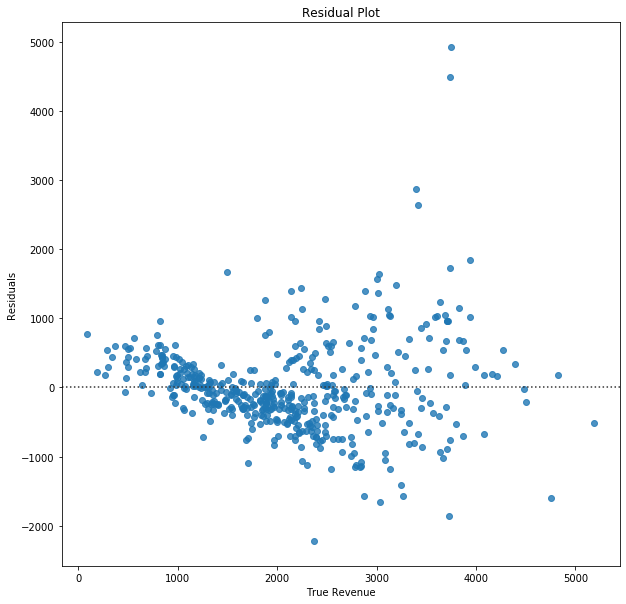

In [67]:
# Model prediction and residuals

# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a residual plot
sns.residplot(x = ard_pred,  # prediction values
              y = y_test) # actual values

# labels
plt.xlabel("True Revenue")
plt.ylabel("Residuals")
plt.title('Residual Plot')

# saving figure in working directory
plt.savefig("Chef Revenue Plot.png")


# displaying the plot
plt.show()


There's no evident pattern in this residual plot.

In [68]:
# specifying file names
dataset_file     = 'chef_feature_rich.xlsx'
performance_file = 'regression_model_performance.xlsx'

# reading the files into Python
chef        = pd.read_excel(dataset_file)
performance = pd.read_excel(performance_file)

<b>k-Nearest Neighbors (KNN)

The model is not overfitting now!

In [69]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 71)

# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)

# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)

# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(4))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(4))

# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)


Training Score: 0.7015
Testing Score: 0.6649


The deviance is 3.66%, which means this model is good!

<b> Random Forest Regression

In [70]:
# INSTANTIATING a model object
rf_model = RandomForestRegressor()


# FITTING the training data
rf_fit = rf_model.fit(X_train, y_train)


# PREDICTING on new data
rf_pred = rf_fit.predict(X_test)

print('Training Score:', rf_model.score(X_train, y_train).round(4))
print('Testing Score:', rf_model.score(X_test, y_test).round(4))

# saving scoring data for future use
rf_train_score = rf_model.score(X_train, y_train).round(4)
rf_test_score  = rf_model.score(X_test, y_test).round(4)


Training Score: 0.9705
Testing Score: 0.7494


This model is highly overfitting - 22.11% deviance

<b>Gradient Boosting Regression

In [71]:
# INSTANTIATING a model object
gb_model = GradientBoostingRegressor()

# FITTING the training data
gb_fit = gb_model.fit(X_train, y_train)


# PREDICTING on new data
gb_pred = gb_fit.predict(X_test)

print('Training Score:', gb_model.score(X_train, y_train).round(4))
print('Testing Score:', gb_model.score(X_test, y_test).round(4))

# saving scoring data for future use
gb_train_score = gb_model.score(X_train, y_train).round(4)
gb_test_score  = gb_model.score(X_test, y_test).round(4)

Training Score: 0.9013
Testing Score: 0.7851


The model is also highly overfitting - 11.62% deviance

In [72]:
# comparing results
print(f"""
Model                  Train Score      Test Score                           
----------------        ---------       ----------        
OLS                             {lr_train_score}             {lr_test_score}    
Ridge                           {ridge_train_score}             {ridge_test_score}    
Lasso                           {lasso_train_score}             {lasso_test_score}    
ARD                             {ard_train_score}             {ard_test_score}    
KNN Standardized                {knn_stand_score_train}             {knn_stand_score_test} 
Random Forest Regression        {rf_train_score}             {rf_test_score}  
Gradient Boosting Regression    {gb_train_score}             {gb_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD', 
                                   'KNN_S_71', 'RandomForestRegression',
                                   'GradientBoostingRegression'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score,
                                   knn_stand_score_train, rf_train_score,
                                   gb_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score,
                                   knn_stand_score_test, rf_test_score,
                                   gb_test_score]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)

total_performance = total_performance.sort_values(by = 'Testing',
                                                  ascending = False)

# sending model results to Excel
total_performance.to_excel('regression_model_performance.xlsx',
                           index = False)


Model                  Train Score      Test Score                           
----------------        ---------       ----------        
OLS                             0.7346             0.6731    
Ridge                           0.7345             0.6731    
Lasso                           0.7344             0.6728    
ARD                             0.7344             0.6728    
KNN Standardized                0.7015             0.6649 
Random Forest Regression        0.9705             0.7494  
Gradient Boosting Regression    0.9013             0.7851



To get a high training/testing score, Random Forest Regression and Gradient Boosting Regression models are the best, but they are both quite overfitting.<br>
Regarding to the fitness, KNN is the best.

<b> Decision Trees (CART Model)

In [73]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [74]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeRegressor()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)

print('Training Score:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing Score:', full_tree_fit.score(X_test, y_test).round(4))

# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4)
full_tree_test_score = full_tree_fit.score(X_test, y_test).round(4)

Training Score: 1.0
Testing Score: 0.6278


The model is super overfitting!

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.283016 to fit



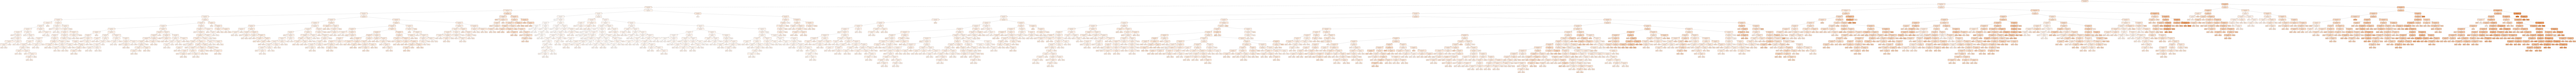

In [75]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

Training ACCURACY: 0.7085
Testing  ACCURACY: 0.6163


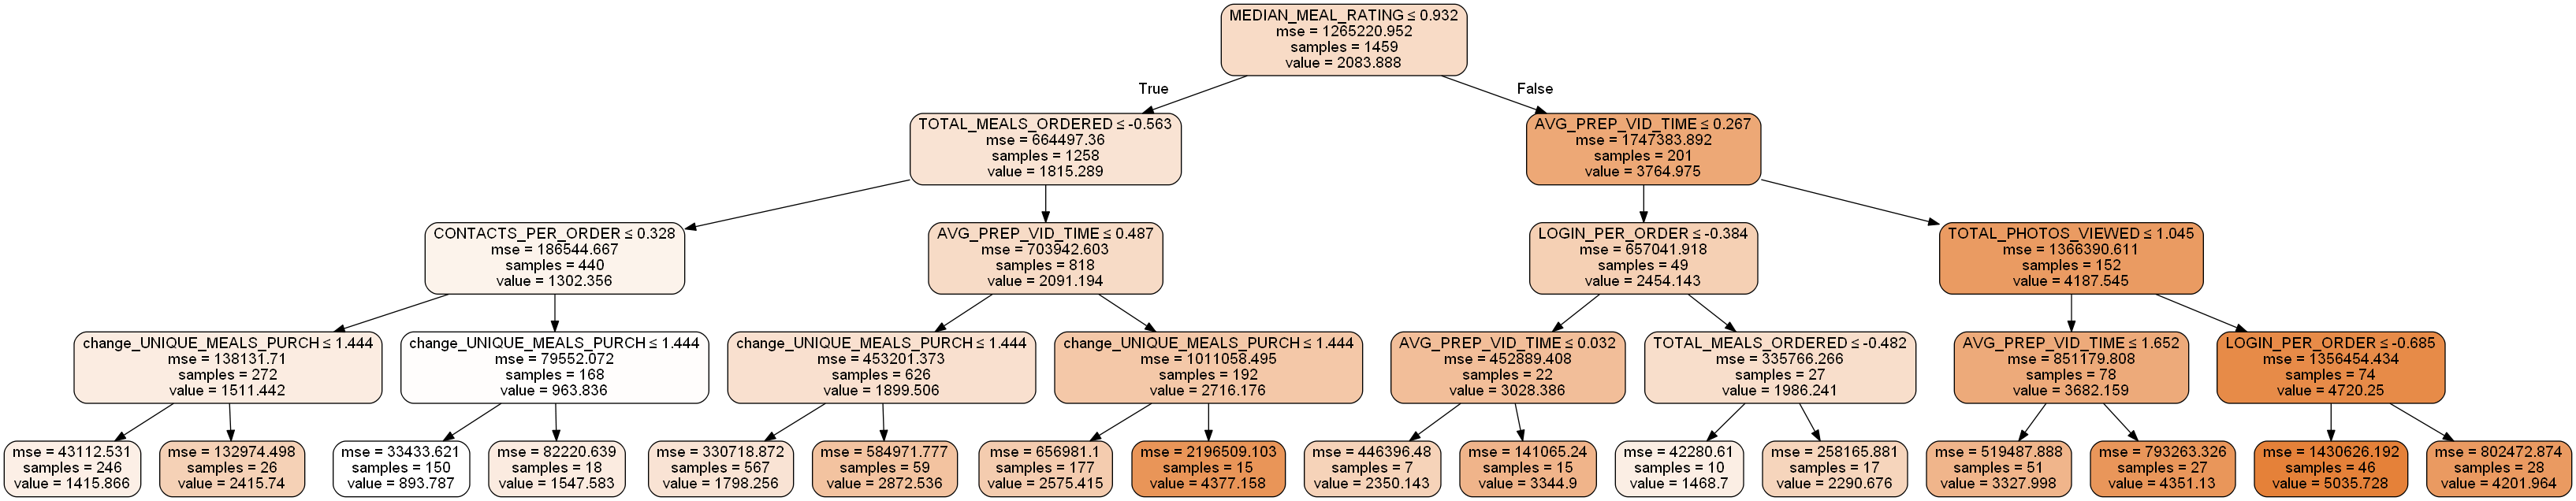

In [76]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeRegressor(max_depth = 4,
                                    min_samples_leaf = 5,
                                    random_state = 222)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))

# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(X_train, y_train).round(4)
pruned_tree_test_score = tree_pruned_fit.score(X_test, y_test).round(4)

# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train,
             height     = 2000,
             width      = 2000)

Pruned tree is a little overfitting.

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


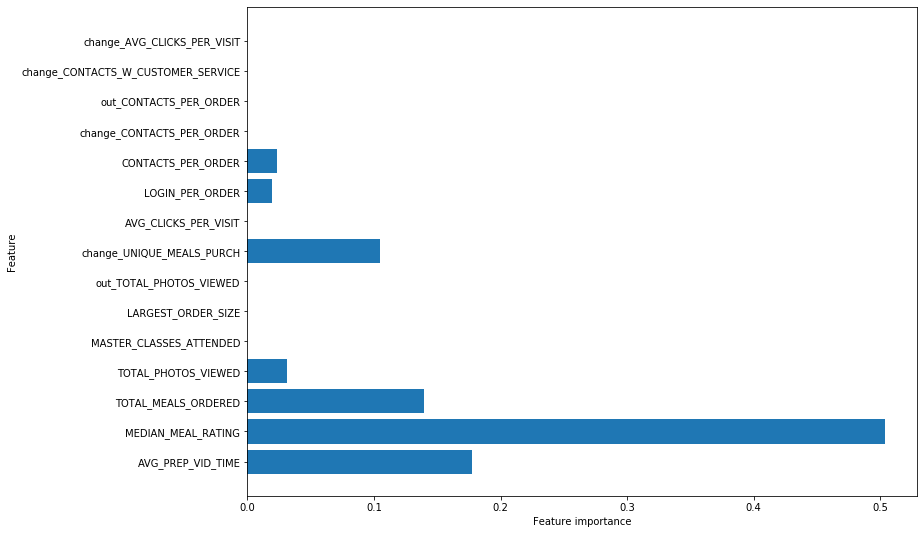

In [78]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = pd.DataFrame(X_train),
                         export = False)

"MEDIAN_MEAL_RATING", "AVG_PREP_VID_TIME", "TOTAL_MEALS_ORDERED", "TOTAL_PHOTOTS_VIEWED", "CONTACTS_PER_ORDER" and "LOGIN_PER_ORDER" are the most important features for REVENUE under the pruned tree model.

In [79]:
# comparing results
print(f"""
Model                  Train Score      Test Score                           
----------------        ---------       ----------        
OLS                             {lr_train_score}             {lr_test_score}    
Ridge                           {ridge_train_score}             {ridge_test_score}    
Lasso                           {lasso_train_score}             {lasso_test_score}    
ARD                             {ard_train_score}             {ard_test_score}    
KNN Standardized                {knn_stand_score_train}             {knn_stand_score_test} 
Random Forest Regression        {rf_train_score}             {rf_test_score}  
Gradient Boosting Regression    {gb_train_score}             {gb_test_score}
Full Tree                       {full_tree_train_score}                {full_tree_test_score}
Pruned Tree                     {pruned_tree_train_score}             {pruned_tree_test_score}
""") 


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD', 
                                   'KNN_S_71', 'RandomForestRegression',
                                   'GradientBoostingRegression',
                                   'Full Tree', 'Pruned Tree'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score,
                                   knn_stand_score_train, rf_train_score,
                                   gb_train_score, full_tree_train_score,
                                   pruned_tree_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score,
                                   knn_stand_score_test, rf_test_score,
                                   gb_test_score, full_tree_test_score,
                                   pruned_tree_test_score]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)

total_performance = total_performance.sort_values(by = 'Testing',
                                                  ascending = False)

# sending model results to Excel
total_performance.to_excel('regression_model_performance.xlsx',
                           index = False)


Model                  Train Score      Test Score                           
----------------        ---------       ----------        
OLS                             0.7346             0.6731    
Ridge                           0.7345             0.6731    
Lasso                           0.7344             0.6728    
ARD                             0.7344             0.6728    
KNN Standardized                0.7015             0.6649 
Random Forest Regression        0.9705             0.7494  
Gradient Boosting Regression    0.9013             0.7851
Full Tree                       1.0                0.6278
Pruned Tree                     0.7085             0.6163



There is still no perfect model, let's do some hyperparamter tuning.

<b> Hyperparameter Tuning on Random Forest Regression

In [80]:
# loading data
original_df = pd.read_excel('chef_feature_rich.xlsx')

# loading model performance
model_performance = pd.read_excel('regression_model_performance.xlsx')

In [81]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestRegressor(random_state = 222)


# GridSearchCV object
full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
                              param_grid = param_grid,
                              cv         = 3)


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Tuned Parameters  : {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 350, 'warm_start': True}
Tuned Training AUC: 0.795


In [82]:
# INSTANTIATING the model object without hyperparameters
rf_tuned = RandomForestRegressor(bootstrap        = True,
                                 min_samples_leaf = 1,
                                 n_estimators     = 350,
                                 warm_start       = True,
                                 random_state     = 222)


# FIT step is needed as we are not using .best_estimator
rf_tuned_fit = rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_tuned_pred = rf_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_tuned_fit.score(X_test, y_test).round(4))

rf_tuned_train_score = rf_tuned_fit.score(X_train, y_train).round(4)
rf_tuned_test_score = rf_tuned_fit.score(X_test, y_test).round(4)

Training ACCURACY: 0.9724
Testing  ACCURACY: 0.7583


The model is still super overfitting.

<b> Hyperparameter Tuning on Gradient Boosting Regression

In [84]:
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingRegressor(random_state = 222)


# GridSearchCV object
full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           param_grid = param_grid,
                           cv         = 3)


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\isabe\New Folder\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Tuned Training AUC: 0.8037


In [ ]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                      max_depth     = 3,
                                      n_estimators  = 150,
                                      random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))

gbm_tuned_train_score = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_tuned_test_score = gbm_tuned_fit.score(X_test, y_test).round(4)

The model is super overfitting.

In [ ]:
# comparing results
print(f"""
Model                            Train Score            Test Score                           
----------------                 ---------              ----------        
OLS                                   {lr_train_score}             {lr_test_score}    
Ridge                                 {ridge_train_score}             {ridge_test_score}    
Lasso                                 {lasso_train_score}             {lasso_test_score}    
ARD                                   {ard_train_score}             {ard_test_score}    
KNN Standardized                      {knn_stand_score_train}             {knn_stand_score_test} 
Random Forest Regression              {rf_train_score}             {rf_test_score}  
Gradient Boosting Regression          {gb_train_score}             {gb_test_score}
Full Tree                             {full_tree_train_score}                {full_tree_test_score}
Pruned Tree                           {pruned_tree_train_score}             {pruned_tree_test_score}
Random Forest Regression Tuned        {rf_tuned_train_score}             {rf_tuned_test_score}
Gradient Boosting Regression Tuned    {gbm_tuned_train_score}             {gbm_tuned_test_score}
""") 


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD', 
                                   'KNN_S_71', 'RandomForestRegression',
                                   'GradientBoostingRegression',
                                   'Full Tree', 'Pruned Tree',
                                   'Random Forest Regression Tuned',
                                   'Gradient Boosting Regression Tuned'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score,
                                   knn_stand_score_train, rf_train_score,
                                   gb_train_score, full_tree_train_score,
                                   pruned_tree_train_score, rf_tuned_train_score,
                                   gbm_tuned_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score,
                                   knn_stand_score_test, rf_test_score,
                                   gb_test_score, full_tree_test_score,
                                   pruned_tree_test_score, rf_tuned_test_score,
                                   gbm_tuned_test_score]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)

total_performance = total_performance.sort_values(by = 'Testing',
                                                  ascending = False)

# sending model results to Excel
total_performance.to_excel('regression_model_performance.xlsx',
                           index = False)